<h1 style='color:blue;' align='center'>KFold Cross Validation Python Tutorial</h2>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [27]:
digits.data.shape

(1797, 64)

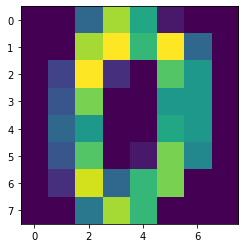

In [32]:
plt.imshow(digits.data[0].reshape(8,8))

5

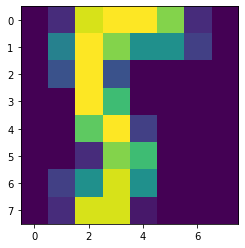

In [44]:
n = 165
plt.imshow(digits.data[n].reshape(8,8))
digits.target[n]

In [29]:
### number of labels
digits.target.shape

(1797,)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9611111111111111

**SVM**

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4203703703703704

**Random Forest**

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Use KFold for our digits example**

In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [10]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [11]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [12]:
scores_rf

[0.9181969949916527, 0.9415692821368948, 0.9348914858096828]

<h2 style='color:purple'>cross_val_score function</h2>

In [13]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [14]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [15]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**random forest performance using cross_val_score**

In [16]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.94323873, 0.95993322, 0.93155259])

cross_val_score uses stratifield kfold by default

<h2 style='color:purple'>Parameter tunning using k fold cross validation</h2>

In [17]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8831626319056486

In [18]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.936554934823091

In [19]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443482309124767

In [20]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9460180012414648

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

<h2 style='color:purple'>Exercise</h2>

Use iris flower dataset from sklearn library and use cross_val_score against following
models to measure the performance of each. In the end figure out the model with best performance,
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest

In [46]:
from sklearn.datasets import load_iris
# import some data to play with
iris = load_iris()

In [50]:
iris.data.shape

(150, 4)

In [52]:
iris.target.shape

(150,)

In [57]:
s1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=5)


array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [58]:
s2 = cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [59]:
s3 = cross_val_score(RandomForestClassifier(n_estimators=40),iris.data, iris.target,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [65]:
s4 = cross_val_score(DecisionTreeClassifier(),iris.data, iris.target,cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])